### 의사결정나무
#### 1. 데이터 > '알고리즘' > 모델
##### 1) 데이터에 내재된 패턴을 변수의 조합으로, 나타내는 예측/분류 모델을 나무의 형태로 만드는 것  
##### 2) 데이터를 2개 혹은 그 이상의 부분집합으로 분할, 데이터가 '균일'해지도록 분할
##### 3) 균일의 의미? 예측(비슷한 수치를 갖고 있는 관측치의 모음), 분류(비슷한 범주를 갖고 있는 관측치의 모음)
##### 4) 이진분할 : 부분집합의 개수 == 끝 마디 노드(Terminal Node) 개수
##### 5) 의사결정나무 모형 : 변수(차원)의 개수와 상관없이 2차원 공간에 나무의 형태로 표현 가능 및 해석력 우수

#### 2. 예측나무 모델(Regression Tree)
##### 1) 보통 새로운 데이터의 Y값은 해당 데이터가 속한 부분집합의 관측치들의 평균으로 나눠서 구한다.
##### 2) CmI 의 I는 Indicator Funtion : 중괄호에 있는 것이 참(True) > 1, 거짓(False) > 0, 
##### > x1, x2가 Rm 지역에 있느냐에 따라 참, 거짓 리턴
##### > 미래의 데이터가 R3 지역에 존재한다면? f(x) = C3

#### 3. 예측나무 모델링 프로세스
##### 1) Sum((실제 Y값 - 모델예측 Y값)^2) 최소화 되려면 , 각 분할에 속해있는 y값들의 평균으로 예측했을 때 오류가 최소이다. > 최상의 분할
##### 2) 예측모델에서 분할변수(j), 분할점(s)은 어떻게 결정할까?
##### > 분할변수(j) X 분할점(s)의 경우의 수를 모두 수행
##### > 기존 데이터에 대한 설명 : 각 경우의 수 마다 Sum((실제 Y값 - 해당 분할의 Y값들의 평균)^2) 작을 때까지 반복하면서 분할
##### > 미래 데이터에 대한 예측 : 분할의 Y값들의 평균으로 예측

#### 4. 분류나무 모델링 프로세스
##### 1) 관측치 마다 반응변수 값 yi = 1,2,3,,,,, 즉 k개의 클래스 존재
##### 2) Pmk = P(확률), m(끝 노드), k(클래스) = P11(1번 끝노드에서 1클래스에 속해 있는 관측치의 비율)
##### > 끝노드 m으로 분류된 관측치는 k(m) 클래스로 분류
##### 3) 분류 모델에서의 비용함수(불순도 측정) : Misclassification rate(실제 범주 ~ 모델 범주가 얼마나 매칭?), Gini Index , Cross-entropy
##### 4) 예측모델에서 분할변수(j), 분할점(s)은 어떻게 결정할까?(분할법칙)
##### > 분할변수와 분할점은 목표변수의 분포를 가장 잘 구별해주는 쪽으로 정함 - 순수도(Purity), 불순도(impurity)
##### > '불순도 감소'가 최대 혹은 '낮은비용' 함수 선택
##### 5) Information Gain - Cross Entropy : 엔트로피는 무질서도, 혼잡도 > 무질서, 혼잡소를 줄였다면 그 변수는 중요한 변수

#### 5. 개별 트리 모델의 단점 > 랜덤포레스트
##### 1) 계층적구조, 에러 전파
##### 2) 학습 데이터의 미세한 변동 > 최종 결과에 영향
##### 3) 적은 개수의 노이즈에도 크게 영향
##### 4) 최종노드 개수가 늘어나면 과적합 

#### 6. 실습
##### 1) Parameter 튜닝 중요 : depth, terminal node(leaf node) 조절 중요
##### 2) 결측치 처리 필요
##### 3) ROC_AUC : 논문에는 0.9 Good, 0.7~0.8 pair, 0.7 미만은 좋지 못한 성능
##### 4) GridSearchCV 전 > 후 비교 필요, 해석상 '과적합을 막고 최적의 분류 모델을 찾기 위해 GridSearchCV를 사용하였다.' 작성 위함.

## 1. boston데이터를 가지고 집값을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 (예측)

In [45]:
import pandas as pd 
from sklearn.datasets import load_boston
boston= load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [46]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [48]:
# 1. 데이터 전처리
# 1-1) 결측치 확인
X.info() # 결측치 X
# 1-2) 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1000)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
(354, 13)
(354,)
(152, 13)
(152,)


In [49]:
# 2. 데이터 적합
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

decisionTreeRegressor = DecisionTreeRegressor()
param_grid = {'max_depth' : range(1,40,1), 'min_samples_split': range(2,40,1)}
              #, 'min_samples_leaf' : range(1,20,1), 'max_leaf_nodes' : range(1,5,1)}
model = GridSearchCV(decisionTreeRegressor,param_grid)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('model_best_estimator : ',model.best_estimator_)
print('model_train_score : ', model.score(X_train, y_train)) 
print('model_test_score : ', model.score(X_test, y_test))
print('model_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

model_best_estimator :  DecisionTreeRegressor(max_depth=22, min_samples_split=13)
model_train_score :  0.9659988227262309
model_test_score :  0.6015686521419903
model_RMSE :  5.499176991158088


#### GridSearchCV로 DecisionTree 회귀분석의 최적화된 파라미터는 트리의 최대 깊이(max_depth)  22, 내부 노드를 분할하는데 필요한 최소 샘플 수(min_samples_split)  13이다. 
#### 최적의 파라미터로 생성된 모델의 Train Data의 설명력은 96%, Test Data의 설명력은 60% 이므로 과적합임을 알 수있으며, Test Data 설명력 자체가 높지는 않다.
#### RMSE 값을 통해 집값의 실제값과 예측값은 평균 5.49 차이가 난다고 볼 수 있다.

In [24]:
# 3. 데이터 시각화 : graphvis version 0.10(2021.12월) : 시험장의 버전 체크 필요

## titanic데이터를 가지고 생존율을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 (분류)

In [51]:
import pandas as pd
df_t = pd.read_csv("data/titanic.csv")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [52]:
# 1. 데이터 전처리
# 1-1) 결측치 확인
df_t.info() # age, embarked(embark_town)

#1-2) 결측치 처리 전 중복 컬럼 제거
df_t.drop(columns = ['class', 'embark_town','adult_male'], inplace = True)

# 1-3) 결측치 처리(평균대치법 혹은 최대값대치)
df_t['age'].fillna(df_t['age'].mean(), inplace = True)
df_t['embarked'].fillna(df_t['embarked'].value_counts().index[0], inplace = True)

df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       89

In [53]:
# 1-4) 범주형 변수 처리
df_t # sex, embarked, who
df_t = pd.get_dummies(df_t, columns = ['sex','embarked'])
df_t 

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [54]:
# 1-5) 데이터 분할
X = df_t.drop('survived', axis = 1)
y = df_t['survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 10)
(623,)
(268, 10)
(268,)


model_best_estimator :  DecisionTreeClassifier(max_depth=7, min_samples_split=18)
model_train_score :  0.8651685393258427
model_test_score :  0.8059701492537313
[confusion_matrix]
[[157  11]
 [ 41  59]]
accuracy_score :  0.8059701492537313
recall_score :  0.59
precision_score :  0.8428571428571429
[classification_report]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       168
           1       0.84      0.59      0.69       100

    accuracy                           0.81       268
   macro avg       0.82      0.76      0.78       268
weighted avg       0.81      0.81      0.80       268

ROC_AUC_SCORE :  0.8286011904761905
[ROC_CURVE]


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


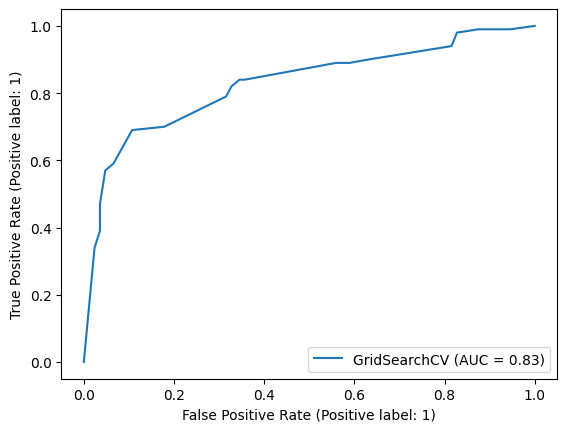

In [65]:
# 2. DecisionTree Classifier 적합
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_roc_curve, roc_auc_score
import numpy as np

decisionTreeClassifier = DecisionTreeClassifier()
param_grid = {'max_depth' : range(1,40,2), 'min_samples_split': range(2,40,2)}
model = GridSearchCV(decisionTreeClassifier, param_grid)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)

print('model_best_estimator : ',model.best_estimator_) # model.fit() 이후에 사용가능
print('model_train_score : ', model.score(X_train, y_train))
print('model_test_score : ', model.score(X_test, y_test))

print('[confusion_matrix]')
print( confusion_matrix(y_test, y_pred))
print('accuracy_score : ', accuracy_score(y_test, y_pred))
print('recall_score : ', recall_score(y_test, y_pred))
print('precision_score : ', precision_score(y_test,y_pred))
print('[classification_report]')
print(classification_report(y_test, y_pred))

print('ROC_AUC_SCORE : ', roc_auc_score(y_test, model.predict_proba(X_test)[:,-1]))

print('[ROC_CURVE]')
print(plot_roc_curve(model, X_test, y_test))

#### GridSearch를 통해 DicisionTree Classfifer의 최적의 매개변수인 max_depth=7, min_samples_split=18으로 모델을 학습시켰다.
#### 그 결과 Train Data의 설명력은 86%이고, Test Data의 설명력은 80%이며, 과적합을 방지했다고 볼 수 있다.
#### 분류 성능 측도인 confusion_matrix를 통해 정확도 80%, 생존에 대한 민감도(실제 생존자 중 예측으로 맞힌 생존자) 59%, 생존에 대한 정밀도(예측한 생존자 중 실제 생존자) 84% 이며, 생존에 대한 민감도를 제외하고 나머지 측도는 준수하다고 볼 수 있다.
#### 더불어 ROC_AUC_SCORE  0.84 이므로 준수한 모델이라고 할 수 있다.